# 1. Introduction
## 1.1 Background and Problem Addressed
As the one of the most common payment methods in the twenty one century, credit cards play an important role in people’s lives. Credit card generally refers to a special card which is assigned to the cardholders, give them an amount of credit limit or withdraw cash that they may purchase goods and paying services first and pay to the bank larter in advance.
However, due to the development of e-commerce, there has been a lot of fraudulent activities such as money laundering, illegal theft, internet fraud, appearing during transactions of credit cards. Series of spam has reduced customers’ trust, and banks have always strived to find more appropriate ways to prevent credit card fraud. Two common ways to avoid fraud in recent years are: prevention and detection. Prevention acts as a layer of protection, and detection happens when the first layer- prevention has failed. Detection helps in identifying and alerting when a fraudulent transaction is being triggered. Hence, the project processes approaches for accurately detecting credit card transactions by using machine learning methods in python programming.
## 1.2 Project Objectives
The first objective of this project is to propose one model and by using the machine learning approach with a limited number of features effectively detect credit Fraud. The second objective is to make an extensive comparison and review of proposed different classifiers using various performance measures. Hence, this project proposes to use several important models in machine learning to detect fraudulent transactions.

# 2. Dataset Pre-processing 
## 2.1 Data Overview
The data set contains transactions made by credit cards in September 2013 by European cardholders. This data set presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. One thing should be mentioned is that due to the confidential issues, the data set provider cannot provide the original features and more background information about the data, so the features V1„„V28 are the principal components obtained by PCA, and the only features that has been exposed are “time”a and amount. To be more specific, Feature ’Time’ contains the seconds elapsed between each transaction and the first transaction in the data set. The feature ’Amount’ is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature ’Class’ is the response variable and it takes value 1 in case of fraud and 0 otherwise.
  
## 2.2 Data Pre-processing
Figure 1: data overview
After importing the raw data into the programming, the first step of data pre-prossessing is to check if there is missing data in the data set, and to be clarified, this data set is completed with no missing value considered in the data pre-processing. The raw defined two class counts: class count o and class count 1, which can be shown as the graph below, the class 0 contains the number of 284315 data (non-fraud data), and the class 1 contains the number of 429 data(fraud data). The data set is highly unbalanced, the positive class (frauds) account for 0.172 percent of all transactions. We use the oversampling method to tackle the problem of highly unbalanced, please find the results below, the figure shows the result after oversampling.
 
## 2.3 Data Visualization
In this project, we would like to first look at the correlation map of the raw data set. The map’s correlations are between a variable at a particular point on a map(the base point) and the same variable at every other point on the map. Please refer to the graph below, among all the features, V10,12,14 are the three features which have the most negative relationship to the class feature. V4,V11 are the two features with the most positive relationship to the class feature.

##2.4 Model selection and Data set Splitting
The project uses the model selection function in sklearn package to conduct the model selection, and splitting the data set into the train data set and test data set, in programming, the features are: X train, X test, Y train, Y test.

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
credit = pd.read_csv("creditcard.csv",engine='python')  # engine for avoiding unicode error 
# pick relavant data 
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# remove class = NA
credit = credit[credit['Class'].notna()]
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#check if there is missing data
def check_null_values(data): 
    print('=====Number of Missing Values for each Column=====')
    for col in data.columns:
        print(col,'=',data[col].isnull().sum())

check_null_values(credit) #there is no missing data

=====Number of Missing Values for each Column=====
Time = 0
V1 = 0
V2 = 0
V3 = 0
V4 = 0
V5 = 0
V6 = 0
V7 = 0
V8 = 0
V9 = 0
V10 = 0
V11 = 0
V12 = 0
V13 = 0
V14 = 0
V15 = 0
V16 = 0
V17 = 0
V18 = 0
V19 = 0
V20 = 0
V21 = 0
V22 = 0
V23 = 0
V24 = 0
V25 = 0
V26 = 0
V27 = 0
V28 = 0
Amount = 0
Class = 0


In [5]:
credit['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

class 0: (284315, 31)
class 1: (492, 31)


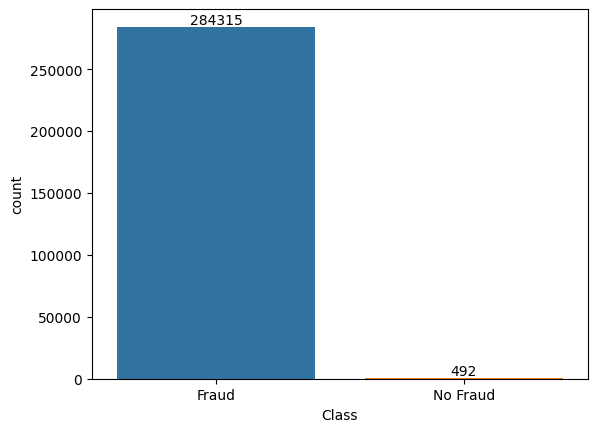

In [6]:
# class count
class_count_0, class_count_1 = credit['Class'].value_counts()

# Separate class
class_0 = credit[credit['Class'] == 0]
class_1 = credit[credit['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)
ax = sns.countplot(x='Class', data=credit)
ax.bar_label(ax.containers[0])
plt.xticks([1,0], ["No Fraud", "Fraud"])
plt.show()

total class of 1 and 0: 1    284315
0    284315
Name: Class, dtype: int64


([<matplotlib.axis.XTick at 0x11fc46830>,
 [Text(1, 0, 'No Fraud'), Text(0, 0, 'Fraud')])

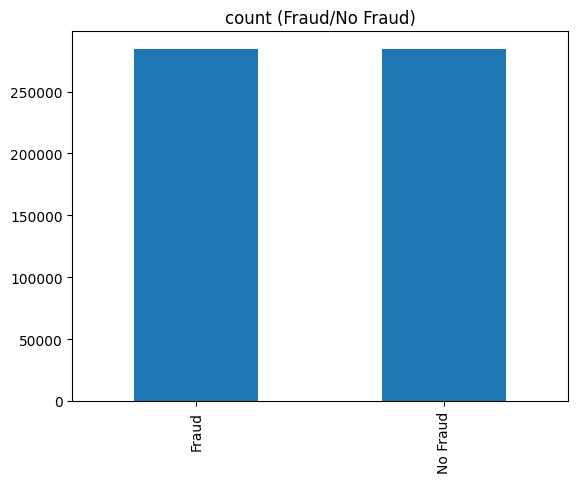

In [7]:
from imblearn.over_sampling import SMOTE
class_1_over = class_1.sample(class_count_0, replace=True)

credit_SMOTE = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",credit_SMOTE['Class'].value_counts())# plot the count after over-sampeling
credit_SMOTE['Class'].value_counts().plot(kind='bar', title='count (Fraud/No Fraud)')
plt.xticks([1,0], ["No Fraud", "Fraud"])

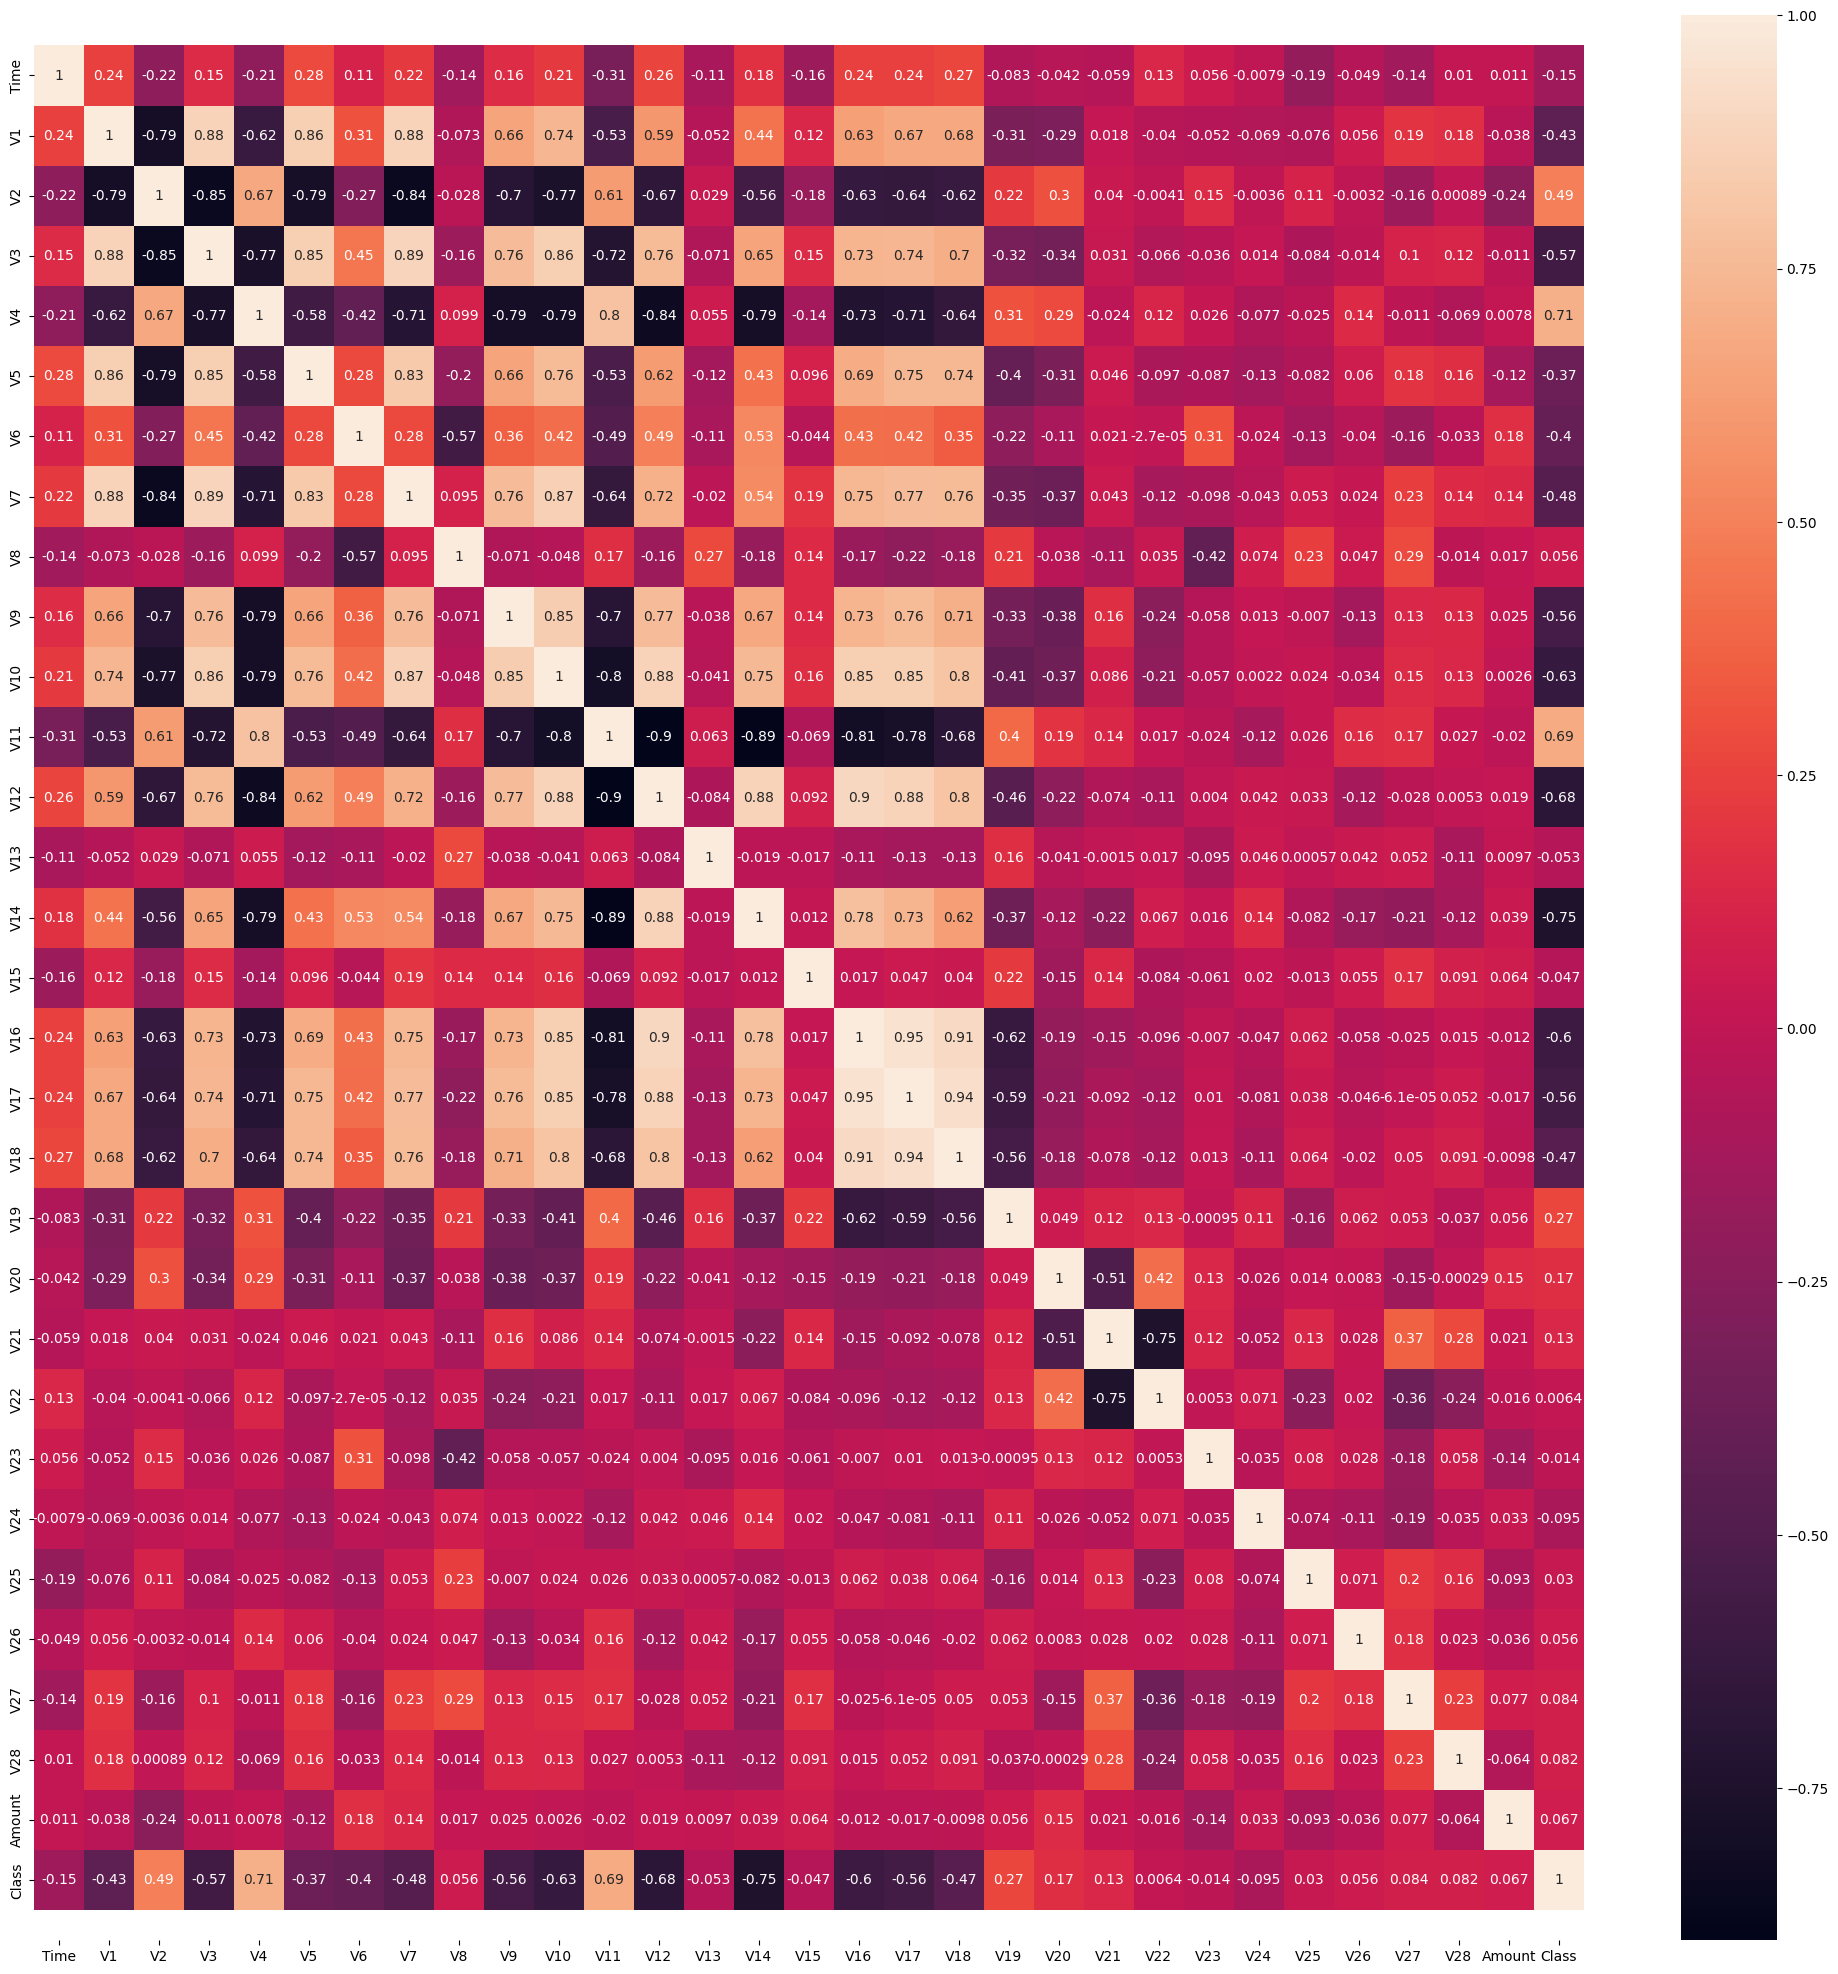

In [10]:
def plot_correlation_map( df ):
    corr = df.corr()
    f,axes = plt.subplots(figsize=(25,25))
    g = sns.heatmap(corr,annot=True,ax=axes)
    bottom, top = g.get_ylim()
    g.set_ylim(bottom+0.5,top-0.5)    # fix annotation not centered 

    
plot_correlation_map(credit_SMOTE)

In [8]:
from sklearn import model_selection
predictors = credit.drop(columns = ['Class'])
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(
    predictors, credit['Class'], test_size=1/4, random_state=0)

# 3. Methods
In our project, we use machine learning to detect fraudulent activities in credit transactions, respec- tively.
- To classify the fraud transactions, we experimented with the supervise method of Logistic Regression, NB, SVM, Random Forest.
- To evaluate our model performance, we will use model assessment strategies like the Confusion Matrix to compute the accuracy, precision, recall, and F1-score, and we also plotted the AUC-ROC curve based on the True positive rate and False positive rate.

## Logistic regression(_________) <- please fill in 
## K-means clustering
## DBSCAN Clustering
## Random forest
## Evaluation : ROC F1-Score Accuracy


## Classification Tree

[[71046    36]
 [   30    90]]
Accuracy: 0.9990730597455127
('true negaive:', 71046) ('false postive:', 36) ('false negative:', 30) ('true postive:', 90) ('false postive rate:', 0.0005064573309698658) ('false negative rate:', 0.25)


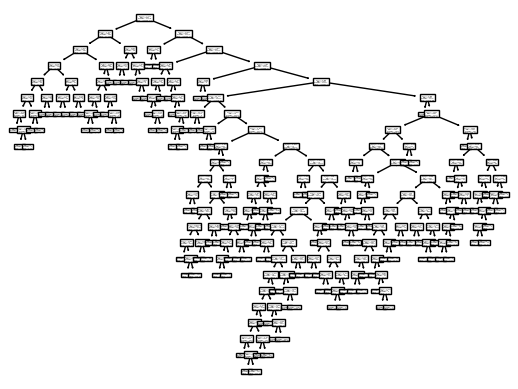

In [9]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

model = tree.DecisionTreeClassifier()

dt = model.fit(X_train, Y_train)
tree.plot_tree(dt)

y_pred_all = dt.predict(X_test)

model_all = metrics.confusion_matrix(Y_test, y_pred_all)
print(model_all)
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_all))

tn2, fp2, fn2, tp2 = metrics.confusion_matrix(Y_test, y_pred_all).ravel()
print(("true negaive:", tn2), 
      ("false postive:", fp2), 
      ("false negative:", fn2), 
      ("true postive:", tp2),
      ('false postive rate:', fp2/(fp2+tn2)),
      ('false negative rate:', fn2/(fn2+tp2)))

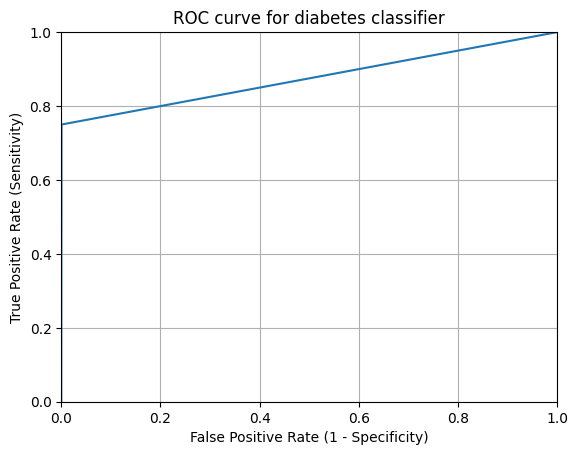

0.8747467713345151


In [10]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_all)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

roc_auc = auc(fpr, tpr)
print (roc_auc)

## Bagging

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(X_train, Y_train)

y_pred_bagging = cls.predict(X_test)

bagging = metrics.confusion_matrix(Y_test, y_pred_bagging)
print(bagging)
print("Accuracy:",cls.score(X_test, Y_test))

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, y_pred_bagging).ravel()
print(("true negaive:", tn), 
      ("false postive:", fp), 
      ("false negative:", fn), 
      ("true postive:", tp),
      ('false postive rate:', fp/(fp+tn)),
      ('false negative rate:', fn/(fn+tp)),
      "F1 Score: ", tp/(tp+1/2*(fp+fn)))

[[71079     3]
 [   34    86]]
Accuracy: 0.9994803516755147
('true negaive:', 71079) ('false postive:', 3) ('false negative:', 34) ('true postive:', 86) ('false postive rate:', 4.220477758082215e-05) ('false negative rate:', 0.2833333333333333) F1 Score:  0.8229665071770335


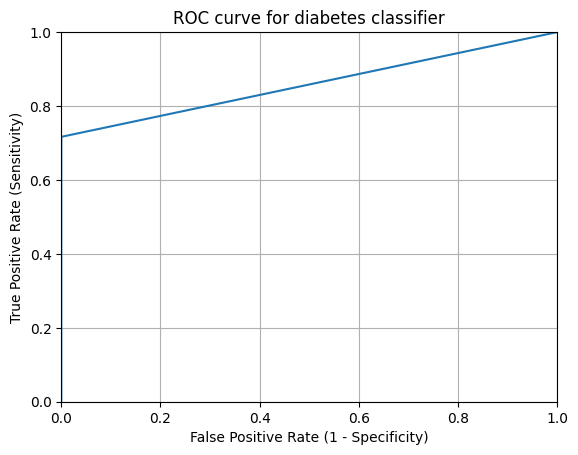

0.858312230944543


In [15]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_bagging)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

roc_auc = auc(fpr, tpr)
print (roc_auc)

## Random Forest

Random forest works in four steps, selecting random samples from a given dataset, constructing a decision tree for each sample and getting a prediction result from each decision tree. The first three steps performs a vote for each predicted result, and the last step is to Select the prediction result with the most votes as the final prediction.
Random forests also offer a good feature selection indicator. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

In [13]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(n_estimators=100, random_state=0)
rfmodel.fit(X_train,Y_train)

y_pred_rf=rfmodel.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_rf))

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, y_pred_rf).ravel()
print(("true negaive:", tn), 
      ("false postive:", fp), 
      ("false negative:", fn), 
      ("true postive:", tp),
      ('false postive rate:', fp/(fp+tn)),
      ('false negative rate:', fn/(fn+tp)),
      "F1 Score: ", tp/(tp+1/2*(fp+fn)))

Accuracy: 0.9995505744220669
('true negaive:', 71075) ('false postive:', 7) ('false negative:', 25) ('true postive:', 95) ('false postive rate:', 9.847781435525168e-05) ('false negative rate:', 0.20833333333333334) F1 Score:  0.8558558558558559


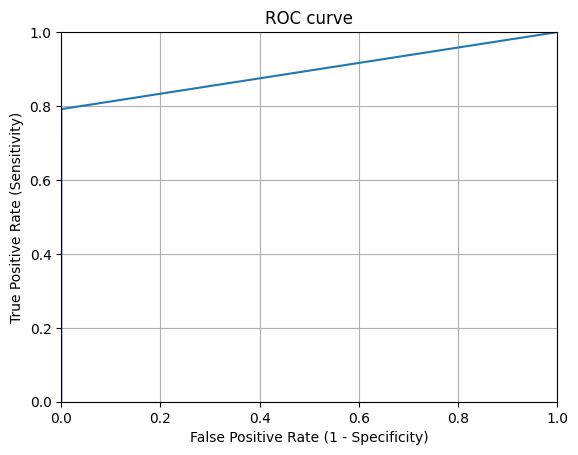

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_rf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

This score will help you choose the most important features and drop the least important ones for model building.
Here are the principles: First, you need to create a random forest model. Second, use the feature importance variable to see feature importance scores. Third, is to visualize these scores.
Refer to the figure stated below, the graph indicates that V17, V14, V12 are the most important features for random forest, their feature importance scores are all over 0.12. So we reduce the variable to 3.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


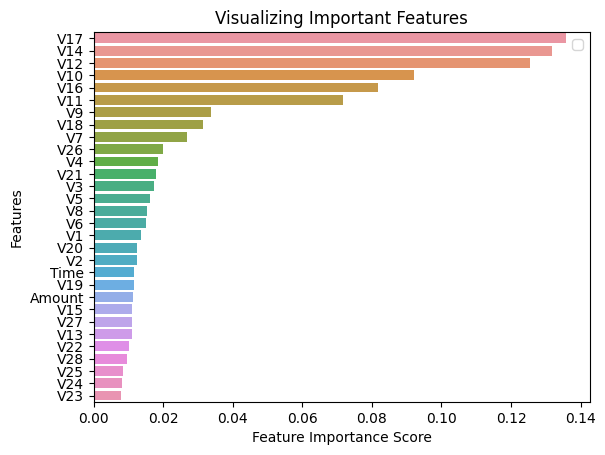

In [15]:

feature_imp = pd.Series(rfmodel.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Next one is the results, both random forest and random forest with feature selection have the accuracy around 99.9percent, so there’s not much difference between them. The higher the precision and recall, means higher the F1-score.
The closer it is to 1, the better the model. Random forest with a full model has a slightly higher F1-score. And this is the same as AUC, the results are 89.56 percent and 87.5 percent respectively.
The last comparison is running time, since we reduce the variables, this dramatically reduces the running time from 3min to 30 seconds.

In [16]:
# Split dataset into features and labels
X=credit[['V17', 'V14','V12']]  # Removed feature "sepal length"
y=credit['Class']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=1/4, random_state=0) 


rfmodel_feature = RandomForestClassifier(n_estimators=100, random_state=0)
rfmodel_feature.fit(X_train,y_train)

y_pred_rf_feature=rfmodel_feature.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_feature))

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_rf_feature).ravel()
print(("true negaive:", tn), 
      ("false postive:", fp), 
      ("false negative:", fn), 
      ("true postive:", tp),
      ('false postive rate:', fp/(fp+tn)),
      ('false negative rate:', fn/(fn+tp)),
      "F1 Score: ", tp/(tp+1/2*(fp+fn)))

Accuracy: 0.9994803516755147
('true negaive:', 71075) ('false postive:', 7) ('false negative:', 30) ('true postive:', 90) ('false postive rate:', 9.847781435525168e-05) ('false negative rate:', 0.25) F1 Score:  0.8294930875576036


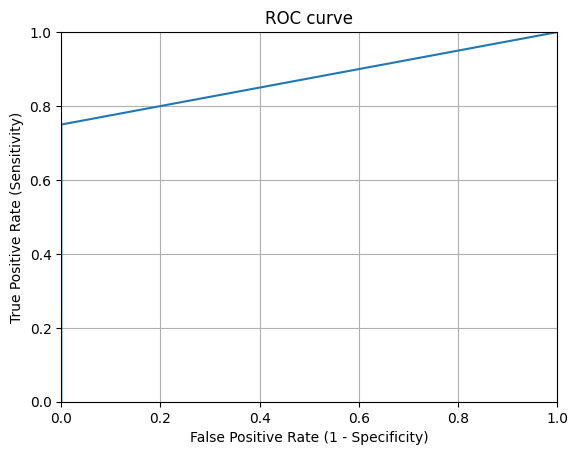

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rf_feature)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

## Logistic Regression
The proposed system uses logistic regression to build the classifier to prevent frauds in credit card transactions. To handle data and to ensure a high degree of detection accuracy, processing step is used before to select data.
The reason behind selecting logistic regression to build the classifier is related to its efficiency of detecting frauds based on its ability to isolate the data that belong to different binary classes. The advantage that we use Logistic regression is easier to implement than linear regression and is very efficient to train.It makes no assumptions about the distributions of classes in the feature space. Moreover, It can easily be extended to multiple classes, and i t is very efficient for classifying unknown records.
Relying on the confusion matrix, the accuracy, and error rate metrics are derived.

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

print(clf.coef_, clf.intercept_)

clf_pred = clf.predict(X_test)
metrics.confusion_matrix(Y_test, clf_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, clf_pred))

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, clf_pred).ravel()
print(("true negaive:", tn), 
      ("false postive:", fp), 
      ("false negative:", fn), 
      ("true postive:", tp),
      ('false postive rate:', fp/(fp+tn)),
      ('false negative rate:', fn/(fn+tp)),
      "F1 Score: ", tp/(tp+1/2*(fp+fn)))

[[-8.79749214e-05  4.12887854e-01 -7.84257544e-01 -7.44505595e-01
   2.00007697e-01  2.10578318e-01 -1.20965449e-01  3.41726779e-01
  -3.92985740e-01 -5.40299748e-01 -3.52369165e-01 -1.94357906e-01
  -2.76593390e-02 -3.98336789e-01 -1.02744541e+00 -3.85022119e-01
  -3.95558199e-01 -7.11015615e-01 -3.06694645e-02  6.02061844e-02
   4.01873874e-02  2.92335014e-01  3.32773932e-01  5.63372541e-02
  -2.11805294e-02 -3.35815911e-01  5.94417941e-02 -7.09315469e-02
   6.42006411e-02 -8.50850604e-03]] [-1.57541478]
Accuracy: 0.9989887924496503
('true negaive:', 71051) ('false postive:', 31) ('false negative:', 41) ('true postive:', 79) ('false postive rate:', 0.00043611603500182887) ('false negative rate:', 0.3416666666666667) F1 Score:  0.6869565217391305


d:\IDE\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# calculate the MCC value
from sklearn.metrics import matthews_corrcoef
mcc1 = matthews_corrcoef(Y_test, clf_pred)
print(mcc1)

0.68710290267352


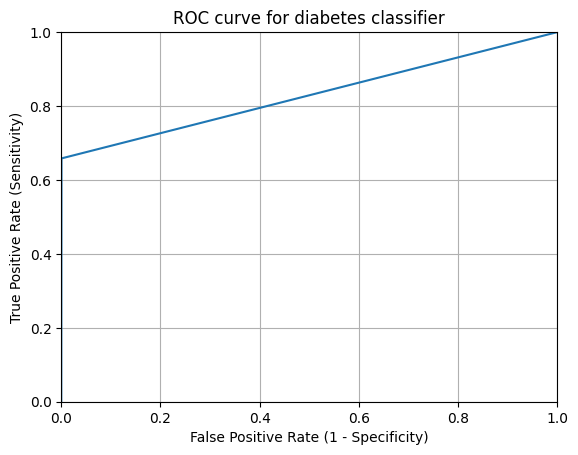

0.8289486086491656


In [18]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, clf_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

roc_auc = auc(fpr, tpr)
print (roc_auc)

In [19]:
from sklearn.linear_model import LogisticRegressionCV
clf_cv = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, Y_train)
clf.cv_pred = clf_cv.predict(X_test)
print(clf_cv.coef_, clf_cv.intercept_)

metrics.confusion_matrix(Y_test, clf.cv_pred)
print("Accuracy:",metrics.accuracy_score(Y_test, clf.cv_pred))

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, clf.cv_pred).ravel()
print(("true negaive:", tn), 
      ("false postive:", fp), 
      ("false negative:", fn), 
      ("true postive:", tp),
      ('false postive rate:', fp/(fp+tn)),
      ('false negative rate:', fn/(fn+tp)),
      ("F1 Score: ", tp/(tp+1/2*(fp+fn))))

d:\IDE\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\IDE\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

[[-3.77677912e-05  2.67613483e-01 -2.67148510e-01 -6.21194179e-01
   3.43048975e-01  1.69120964e-01 -7.20916056e-02  2.77134598e-01
  -3.74564827e-01 -3.69977388e-01 -3.73491847e-01 -2.68057262e-01
  -3.67903861e-02 -2.73405442e-01 -7.03490609e-01 -5.03266690e-01
  -2.55781552e-01 -3.17411506e-01  7.31563333e-02  6.21749908e-02
   2.02381344e-03  3.63910331e-01  4.22723371e-01  1.17706248e-02
  -2.47100902e-02 -4.28483569e-01  1.32730673e-01 -4.80005037e-02
   4.86082047e-02 -1.76643376e-03]] [-4.72024744]
Accuracy: 0.9993399061824106
('true negaive:', 71072) ('false postive:', 10) ('false negative:', 37) ('true postive:', 83) ('false postive rate:', 0.00014068259193607383) ('false negative rate:', 0.30833333333333335) ('F1 Score: ', 0.7793427230046949)


d:\IDE\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# calculate the MCC value
from sklearn.metrics import matthews_corrcoef
mcc2 = matthews_corrcoef(Y_test, clf.cv_pred)
print(mcc2)

0.714061324289858


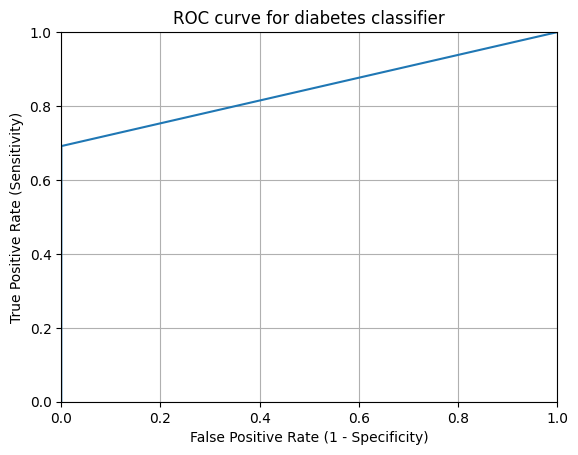

0.8457629920373653


In [20]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, clf.cv_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

roc_auc = auc(fpr, tpr)
print (roc_auc)

For a given classifier, the accuracy can be calculated by considering the recognition rate, which is the percentage of records in the test set that are correctly classified, such as fraudulent or non-fraudulent. In addition, cross-validation ensures that the entire database is employed as both the training and testing data sets, and this in turn enhances the metrics. Then we use the cross-validation to predict the logistic regression again.
Thus the results for accuracy, F1- score, False positive rate, and False negative rate are shown as follow:
The accuracy of our training model more than 95 percent most of the time with random samples. The FPR and FNR for logistic regression is larger than logistic regression with cross-validation.

## Naive Bayes Classifier

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes’ theorem with strong independence assumptions between the features. They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve high accuracy levels.
The process of doing the Bayes methods are shown as follows: According to the figure attached below: the accuracy rate is 99.33 percent, false negative rate is 0.3667, false positive rate is 0.006317, and the AUC score is 92.18 percent, which is the highest score among all the methods.

In [19]:
from sklearn.naive_bayes import GaussianNB

# Choose model hyperparameters

nb = GaussianNB()

# fit the model to the data (aka "model training")

nb.fit(X_train, Y_train)

# The score method returns the accuracy of the model
score = nb.score(X_test, Y_test)
print(score)


nb_pred = nb.predict(X_test)
metrics.confusion_matrix(Y_test, nb_pred)
print("Accuracy:",nb.score(X_test, Y_test))

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, nb_pred).ravel()
print(("true negaive:", tn), 
      ("false postive:", fp), 
      ("false negative:", fn), 
      ("true postive:", tp),
      ('false postive rate:', fp/(fp+tn)),
      ('false negative rate:', fn/(fn+tp)),
      "F1 Score: ", tp/(tp+1/2*(fp+fn)))

0.9933569281761748
Accuracy: 0.9933569281761748
('true negaive:', 70627) ('false postive:', 455) ('false negative:', 18) ('true postive:', 102) ('false postive rate:', 0.006401057933091359) ('false negative rate:', 0.15) F1 Score:  0.30132939438700146


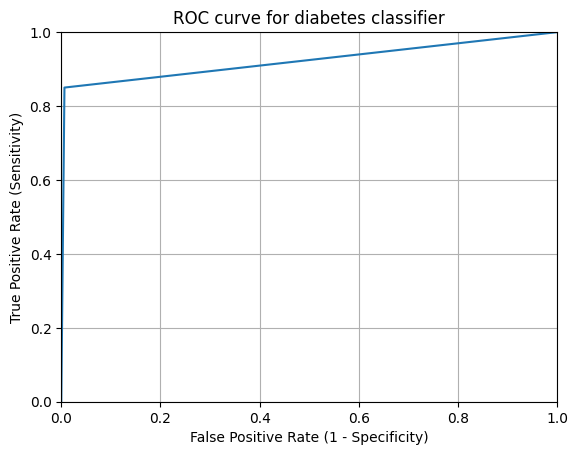

0.9217994710334544


In [21]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, nb_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

roc_auc = auc(fpr, tpr)
print (roc_auc)

## SVM

SVM are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis
An VM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.
SVM processing are following the steps: choose a class of model of SVM, choose model hyper parameters, arrange data into features matrix and target vector, find model to do data, and last one is predict labels for unknown data.

In [23]:
from sklearn.svm import SVC

# Choose model hyperparameters

svm = SVC(kernel='rbf', C=1E6)

# fit the model to the data (aka "model training")

svm.fit(X_train, Y_train)

# The score method returns the accuracy of the model
score = svm.score(X_test, Y_test)
print(score)

svm_pred = svm.predict(X_test)
metrics.confusion_matrix(Y_test, svm_pred)
print("Accuracy:",svm.score(X_test, Y_test))

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, svm_pred).ravel()
print(("true negaive:", tn), 
      ("false postive:", fp), 
      ("false negative:", fn), 
      ("true postive:", tp),
      ('false postive rate:', fp/(fp+tn)),
      ('false negative rate:', fn/(fn+tp)),
      "F1 Score: ", tp/(tp+1/2*(fp+fn)))

0.9987781242099941
Accuracy: 0.9987781242099941
('true negaive:', 71059) ('false postive:', 23) ('false negative:', 64) ('true postive:', 56) ('false postive rate:', 0.0003235699614529698) ('false negative rate:', 0.5333333333333333) F1 Score:  0.5628140703517588


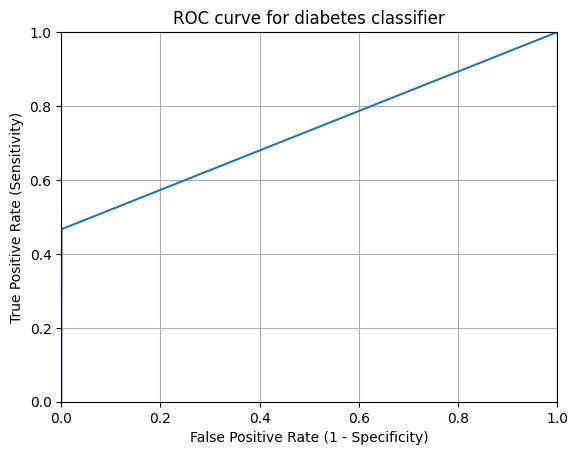

0.7331715483526069


In [25]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, svm_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

roc_auc = auc(fpr, tpr)
print (roc_auc)

# Clustering

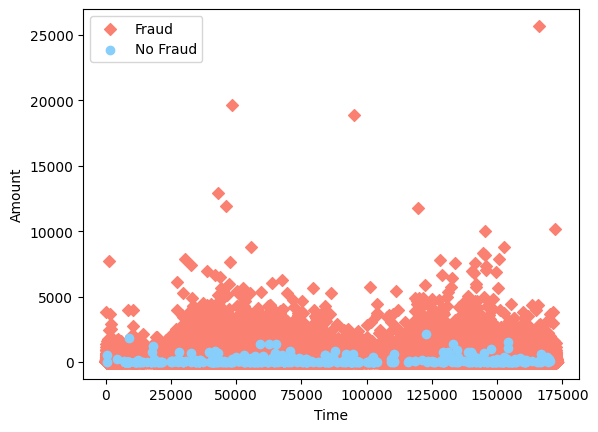

In [12]:
# scatter plot of examples by class label
plt.scatter(credit['Time'][(credit.Class == 0)],
            credit['Amount'][(credit.Class == 0)],
           marker='D',
           color='salmon',
           label='Fraud')
plt.scatter(credit['Time'][credit.Class == 1],
            credit['Amount'][credit.Class == 1],
           marker='o',
           color='lightskyblue',
           label='No Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.show()

## DBSCAN

[-1 -1 -1 ... -1 -1 -1]
            Time        V1        V2        V3        V4        V5        V6  \
80186    58368.0 -0.331775  1.179799  0.674511  1.016720 -0.313840 -0.777468   
170584  120253.0  1.897891 -0.037282 -2.391905  1.063847  1.061291 -0.558035   
212038  138687.0 -3.056957  1.200872  0.766330 -0.469860 -0.236477  0.163301   
211543  138459.0 -1.321976  1.138686 -0.940861  0.154160  0.109802 -0.538822   
86293    61167.0 -0.627810  0.918729  1.478453  0.213171  0.933695  1.261486   
122579   76616.0  1.512602 -0.949435 -0.219062 -1.638850 -0.856348 -0.465996   
152315   97253.0  1.798863 -1.699791 -0.142182 -0.619533 -1.570248  0.083268   
117952   74887.0 -0.589400  0.747828  1.784781  0.899612  0.257067 -0.001301   

              V7        V8        V9  ...       V21       V22       V23  \
80186   0.521521  0.213915 -0.805392  ...  0.201252  0.468349  0.018682   
170584  0.879320 -0.389377 -0.098435  ...  0.142621  0.225650 -0.157726   
212038 -1.106509 -3.670653  0.

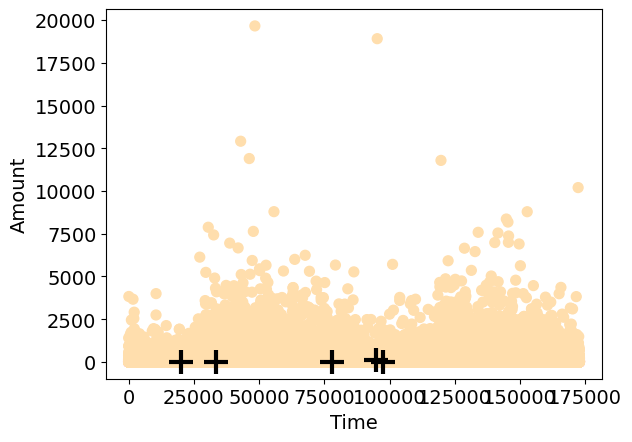

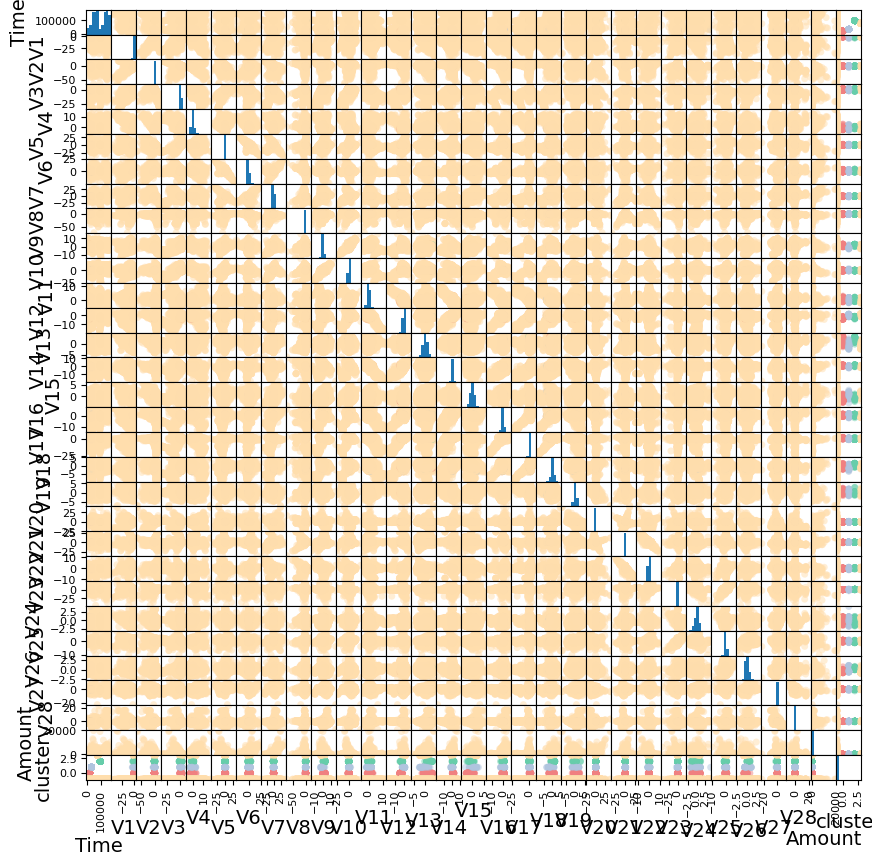

-0.5491758232034107


In [24]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=20, min_samples=100)
db.fit(X_train)

# review the cluster labels
print(db.labels_)

X_train['cluster'] = db.labels_
print(X_train.tail(8))

# save the DataFrame of cluster centers
centers = X_train.groupby('cluster').mean()

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

# create a "colors" array for plotting
import numpy as np
colors = np.array(['lightcoral', 'lightsteelblue', 'mediumaquamarine', 'navajowhite'])

# scatter plot of calories versus alcohol, colored by
#cluster (0=red, 1=green, 2=blue)
plt.scatter(X_train.Time, X_train.Amount,
            c=colors[X_train.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.Time, centers.Amount,
            linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('Time')
plt.ylabel('Amount')

pd.plotting.scatter_matrix(X_train, c=colors[X_train.cluster], figsize=(10,10), s=100)
plt.show()

from sklearn import metrics
print(metrics.silhouette_score(X_train, db.labels_))


In [32]:
np.unique(db.labels_)

array([-1,  0,  1,  2,  3], dtype=int64)

In [33]:
db.fit_predict(X_test)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

## K-means

In [29]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

ncredit = len(credit)
credit_label = pd.DataFrame({'type':[1]*len(credit)})
credit_labeled = credit.join(credit_label,how = 'outer')
X = credit_labeled.iloc[:,:-1]
scal = preprocessing.StandardScaler().fit(X)
X_scaled = scal.transform(X)
kmeans = KMeans(4, random_state = 1)
kmeans.fit(X_scaled)
label = kmeans.predict(X_scaled)
kmeans_label = pd.DataFrame({'kmeans_label':label})
data_predict = credit_labeled.join(kmeans_label,how='outer')
print(data_predict)
data_predict.to_csv('credit.csv')
data2 = sum(abs(data_predict.iloc[:284806,-2]-data_predict.iloc[:284806,-1]))/284806
print('data: ',data2)

tn, fp, fn, tp = metrics.confusion_matrix(Y_test, clf.cv_pred).ravel()
print(("true negaive:", tn), 
      ("false postive:", fp), 
      ("false negative:", fn), 
      ("true postive:", tp),
      ('precision:', tp/(tp+fp)),
      ('recall:', tn/(tn+fn)),
      ("F1 Score: ", tp/(tp+1/2*(fp+fn))))

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V23       V24  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.11047

# 4 Results and Comparisons 
## 4.1 Model Assessment
We used AUC-ROC curve to visualize the model performance, where the x-axis is False Positive Rate and the y-xis is True Positive Rate.
By looking at accuracy, logistic regression gives the highest figures which is around 99.9 percent, but random forest has the best performance with an F1 score of 0.86. And the last criteria is AUC, the highest score is from Naive bayes.
There is a trade-off between accuracy and F1 score. In practice, for multi-class classification models, accuracy is mostly favored. F1 is usually used for multi-label or binary labels where the classes are highly unbalanced.

# 5 Conclusion
This project aimed to compare performance of various machine learning to find one best approach to detect Credit fraud.
The primary focus was on accuracy, by using the following distinct machine-learning methods: Logistic Regression, Naive Bayes Classifier, SVM method, Random Forest method.
The data set used for training as well as testing of the models contained 492 frauds out of 284,807 transactions. All of the algorithms performed well after the data processing may due to the factor of over fitting.
Here are several parts that this project has to continue to work on as the improvements, the first one is over fitting. One evidence can be proved for over fitting is the random forest method, after the figure selection, the accuracy rate decreases compared with the original model. Moreover another evidence is that , as the previous content illustrated, the accuracy rate for all model are above than ninety percent.
Hence, the conclusion propose two ways to consider for further improvements: first, is better to perform feature selection to all models after doing the feature importance figure, and then do prediction, in order to prevent over fitting.
Last but not least, it would be better to consider cross-validation among all the methods, this is another way of preventing over fitting.#